In [90]:
from copulae1 import *
import itertools
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 


In [20]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
rs = data.loc[:, 'log return bitcoin']
rf = data.loc[:, 'log return future']

In [252]:
_rs = rs.iloc[-300:]
_rs.reset_index(drop=True, inplace=True)
_rf = rf.iloc[-300:]
_rf.reset_index(drop=True, inplace=True)

contamination = (-0.0,0.0)
_rs_c = _rs.append(pd.Series([contamination[0]]), ignore_index= True)
_rf_c = _rf.append(pd.Series([contamination[1]]), ignore_index= True)

In [51]:
def rho_Variance(rs, rf, h):
    rh = rs - h*rf
    return Variance(rh)

def rho_ERM10(rs, rf, h):
    rh = rs - h*rf
    return ERM_estimate_trapezoidal(10, rh)

def rho_ES1(rs, rf, h):
    rh = rs - h*rf
    return ES(0.01, rh)

def rho_ES5(rs, rf, h):
    rh = rs - h*rf
    return ES(0.05, rh)

def rho_VaR1(rs, rf, h):
    rh = rs - h*rf
    return VaR(0.01, rh)

def rho_VaR5(rs, rf, h):
    rh = rs - h*rf
    return VaR(0.05, rh)

print(scipy.optimize.fmin(lambda h: rho_Variance(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_Variance(_rs,_rf, h), x0=0.5))

print(scipy.optimize.fmin(lambda h: rho_ERM10(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ERM10(_rs,_rf, h), x0=0.5))

print(scipy.optimize.fmin(lambda h: rho_ES1(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ES1(_rs,_rf, h), x0=0.5))

print(scipy.optimize.fmin(lambda h: rho_ES5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_ES5(_rs,_rf, h), x0=0.5))

print(scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0=0.5))

print(scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5)- 
scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0=0.5))

Optimization terminated successfully.
         Current function value: 0.000283
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000284
         Iterations: 15
         Function evaluations: 30
[0.]
Optimization terminated successfully.
         Current function value: 0.023303
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.023339
         Iterations: 15
         Function evaluations: 30
[0.]
Optimization terminated successfully.
         Current function value: 0.061330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065929
         Iterations: 16
         Function evaluations: 32
[0.06582031]
Optimization terminated successfully.
         Current function value: 0.039790
         Iterations: 15
         Function evaluations: 30
Optimizatio

In [178]:
rs_c_arr = np.linspace(np.min([rs,rf]), np.max([rs,rf]), 30)
rf_c_arr = np.linspace(np.min([rs,rf]), np.max([rs,rf]), 30)

In [262]:
contamination = pd.DataFrame((itertools.product(*[rs_c_arr, rf_c_arr])))

In [181]:
IF_Variance = []
IF_ERM10 = []
IF_ES1 = []
IF_ES5 = []
IF_VaR1 = []
IF_VaR5 = []

old_h_Variance = scipy.optimize.fmin(lambda h: rho_Variance(_rs,_rf, h), x0=0.5)
old_h_ERM10 = scipy.optimize.fmin(lambda h: rho_ERM10(_rs,_rf, h), x0=0.5)
old_h_ES1 = scipy.optimize.fmin(lambda h: rho_ES1(_rs,_rf, h), x0=0.5)
old_h_ES5 = scipy.optimize.fmin(lambda h: rho_ES5(_rs,_rf, h), x0=0.5)
old_h_VaR1 = scipy.optimize.fmin(lambda h: rho_VaR1(_rs,_rf, h), x0=0.5)
old_h_VaR5 = scipy.optimize.fmin(lambda h: rho_VaR5(_rs,_rf, h), x0=0.5)


for i in range(len(contamination)):
    print(i)
    c = contamination.iloc[i,:]
    _rs_c = _rs.append(pd.Series([c.loc[0]]), ignore_index= True)
    _rf_c = _rf.append(pd.Series([c.loc[1]]), ignore_index= True)

    new_h_Variance = scipy.optimize.fmin(lambda h: rho_Variance(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_ERM10 = scipy.optimize.fmin(lambda h: rho_ERM10(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_ES1 = scipy.optimize.fmin(lambda h: rho_ES1(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_ES5 = scipy.optimize.fmin(lambda h: rho_ES5(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_VaR1 = scipy.optimize.fmin(lambda h: rho_VaR1(_rs_c,_rf_c, h), x0=0.5,disp=False)
    new_h_VaR5 = scipy.optimize.fmin(lambda h: rho_VaR5(_rs_c,_rf_c, h), x0=0.5,disp=False)

    IF_Variance.append(new_h_Variance-old_h_Variance)
    IF_ERM10.append(new_h_ERM10-old_h_ERM10)
    IF_ES1.append(new_h_ES1-old_h_ES1)
    IF_ES5.append(new_h_ES5-old_h_ES5)
    IF_VaR1.append(new_h_VaR1-old_h_VaR1)
    IF_VaR5.append(new_h_VaR5-old_h_VaR5)

Optimization terminated successfully.
         Current function value: 0.000284
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.023339
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.065929
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.040883
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 0.042799
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 0.023029
         Iterations: 15
         Function evaluations: 30
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60

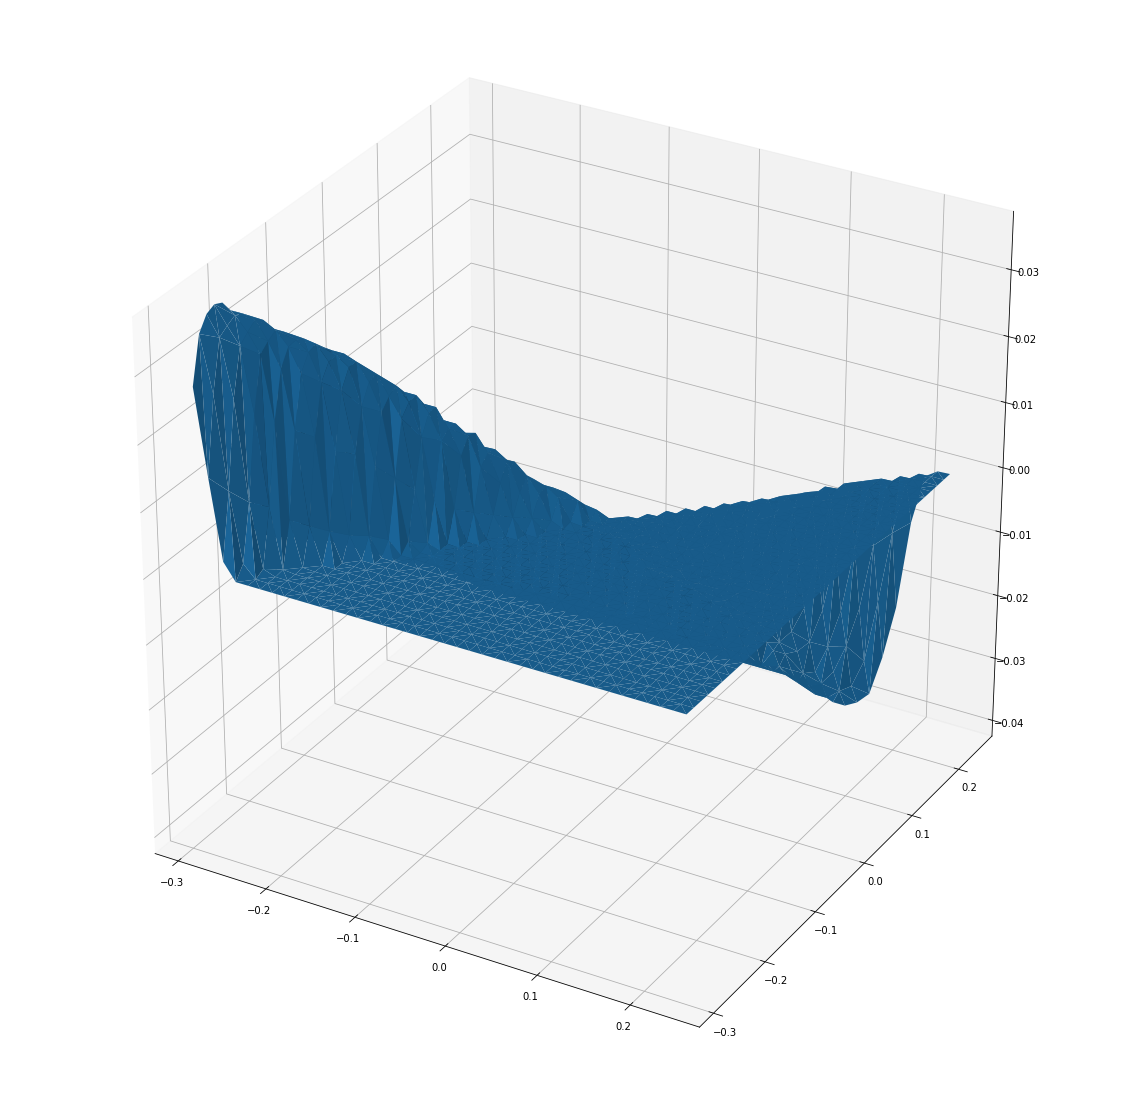

In [114]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_Variance).flatten())
ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ERM10).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ES1).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_ES5).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_VaR1).flatten())
# ax.plot_trisurf(contamination.loc[:,0], contamination.loc[:,1], np.array(IF_VaR5).flatten())

In [188]:
toplot = pd.DataFrame({'x':contamination.iloc[:,0],'y':contamination.iloc[:,1], 'z':np.array(IF_ES1).flatten()} )
toplot = pd.pivot_table(toplot, values='z', index='x', columns='y')

toplot2 = pd.DataFrame({'x':contamination.iloc[:,0],'y':contamination.iloc[:,1], 'z':np.array(IF_VaR1).flatten()} )
toplot2 = pd.pivot_table(toplot2, values='z', index='x', columns='y')

In [189]:
import plotly.graph_objects as go

colors1 = np.zeros(shape=toplot.shape)    
colors2 = np.ones(shape=toplot2.shape)    

cmap = plt.get_cmap("tab10")
colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
              [1, 'rgb' + str(cmap(2)[0:3])]]

fig = go.Figure()

fig.add_trace(go.Surface(
    contours = {},
    x = rs_c_arr,
    y = rf_c_arr,
    z = toplot.values, 
    surfacecolor =colors1,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.add_trace(go.Surface(
    contours = {},
    x = rs_c_arr,
    y = rf_c_arr,
    z = toplot2.values, 
    surfacecolor =colors2,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.update_traces(showscale=False)
fig.show()


In [276]:
u = ECDF(contamination.iloc[:,0])(contamination.iloc[:,0])
v = ECDF(contamination.iloc[:,1])(contamination.iloc[:,1])


toplot = pd.DataFrame({'x':u,'y':v, 'z':np.array(IF_VaR1).flatten()} )
toplot = pd.pivot_table(toplot, values='z', index='x', columns='y')

toplot2 = pd.DataFrame({'x':u,'y':v, 'z':np.array(IF_VaR5).flatten()} )
toplot2 = pd.pivot_table(toplot2, values='z', index='x', columns='y')

In [277]:
import plotly.graph_objects as go

colors1 = np.zeros(shape=toplot.shape)    
colors2 = np.ones(shape=toplot2.shape)    

cmap = plt.get_cmap("tab10")
colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
              [1, 'rgb' + str(cmap(2)[0:3])]]

fig = go.Figure()

fig.add_trace(go.Surface(
    contours = {},
    x = ECDF(rs_c_arr)(rs_c_arr),
    y = ECDF(rf_c_arr)(rf_c_arr),
    z = toplot.values, 
    surfacecolor =colors1,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))

fig.add_trace(go.Surface(
    contours = {},
    x = ECDF(rs_c_arr)(rs_c_arr),
    y = ECDF(rf_c_arr)(rf_c_arr),
    z = toplot2.values, 
    surfacecolor =colors2,
    colorscale=colorscale,
    cmin=0, cmax=1, opacity=.7))


fig.update_traces(showscale=False)
fig.show()


In [353]:
from KDEs import *

contamination = (-0.2,0.2)
_rs_c = _rs.append(pd.Series([contamination[0]]), ignore_index= True)
_rf_c = _rf.append(pd.Series([contamination[1]]), ignore_index= True)

u = ECDF(_rs)(_rs)
v = ECDF(_rf)(_rf)
kde_rs = KDE(_rs, 'Gaussian')
kde_rf = KDE(_rf, 'Gaussian')

u_c = ECDF(_rs_c)(_rs_c)
v_c = ECDF(_rf_c)(_rf_c)
kde_rs_c = KDE(_rs_c, 'Gaussian')
kde_rf_c = KDE(_rf_c, 'Gaussian')
q_arr = [0.05,0.1,0.9,0.95]


In [327]:
C = t_Copula({'rho':0.9, 'nu':4}, kde_rs, kde_rf, 2)
C.canonical_calibrate(u,v)
print(C.paras)
print(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))

C = t_Copula({'rho':0.9, 'nu':4}, kde_rs_c, kde_rf_c, 2)
C.canonical_calibrate(u_c,v_c)
print(C.paras)
print(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))

Optimization terminated successfully.
         Current function value: -1.016117
         Iterations: 145
         Function evaluations: 279
{'rho': 0.9278048878093252, 'nu': 2.0000000000000124}
Optimization terminated successfully.
         Current function value: 0.000712
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.036797
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.101799
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.058953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.070342
         Iterations: 13
         Function evaluations: 29
Optimization terminated successfully.
         Current function value: 0.035557
         Iterations: 13
         Fu

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:257: RuntimeWarning:

invalid value encountered in true_divide



Optimization terminated successfully.
         Current function value: -1.013999
         Iterations: 159
         Function evaluations: 301
{'rho': 0.9289310606072303, 'nu': 2.0000000000000404}
Optimization terminated successfully.
         Current function value: 0.015268
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.199239
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.826021
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.386382
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 0.762999
         Iterations: 11
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.061352
         Iterations: 14
         Fu

In [328]:
C = t_Copula({'rho':0.9, 'nu':4}, kde_rs, kde_rf, 2)
C.mm_calibrate(u, v, q_arr)
print(C.paras)
print(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))

C = t_Copula({'rho':0.9, 'nu':4}, kde_rs_c, kde_rf_c, 2)
C.mm_calibrate(u_c, v_c, q_arr)
print(C.paras)
print(optimize_h(C, [10], [0.01,0.05], [0.01,0.05]))

Optimization terminated successfully.
         Current function value: 0.008649
         Iterations: 138
         Function evaluations: 257
{'rho': 0.9619684534384179, 'nu': 2.0000000000000284}
Optimization terminated successfully.
         Current function value: 0.000208
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.020681
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.056980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.032714
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.038206
         Iterations: 14
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 0.019454
         Iterations: 12
         Fun

(-0.3, 0.3)

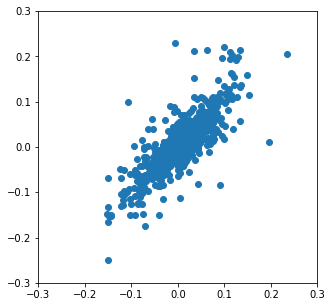

In [331]:
C = t_Copula({'rho':0.8, 'nu':2}, kde_rs_c, kde_rf_c, 2)
s = C.sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.3))

(-0.3, 0.3)

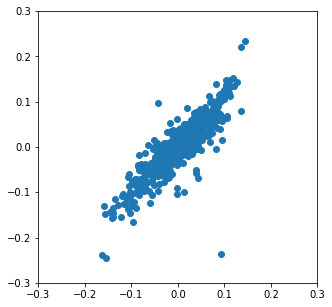

In [332]:
C = t_Copula({'rho':0.9, 'nu':2}, kde_rs_c, kde_rf_c, 2)
s = C.sample(1000)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.3))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



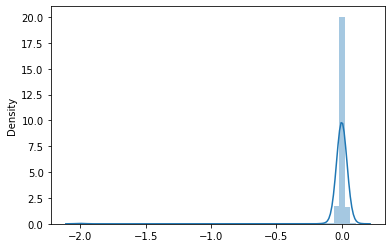

In [335]:
sns.distplot(_rs_c - _rf_c)

0.846153846153846
0.7435897435897436


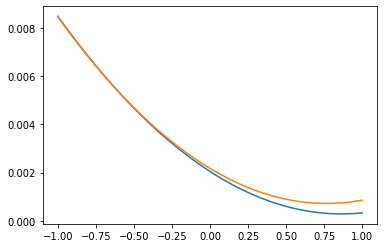

In [359]:
h_arr = np.linspace(-1,1,40)
results = [rho_Variance(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

h_arr = np.linspace(-1,1,40)
results = [rho_Variance(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.8974358974358974
0.846153846153846


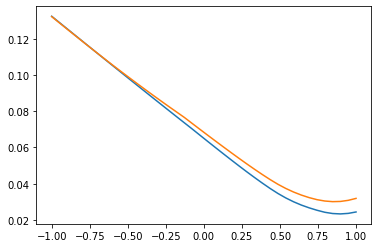

In [354]:
h_arr = np.linspace(-1,1,40)
results = [rho_ERM10(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])
h_arr = np.linspace(-1,1,40)
results = [rho_ERM10(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.641025641025641
0.641025641025641


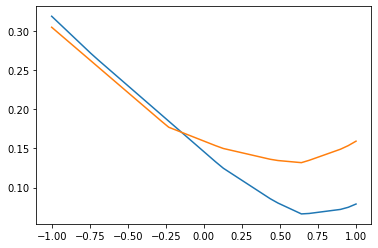

In [355]:
h_arr = np.linspace(-1,1,40)
results = [rho_ES1(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])
h_arr = np.linspace(-1,1,40)
results = [rho_ES1(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.8974358974358974
0.846153846153846


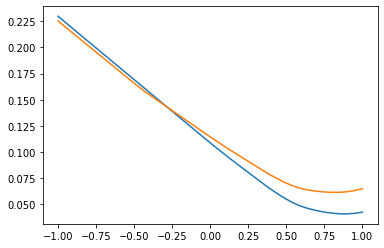

In [356]:
h_arr = np.linspace(-1,1,40)
results = [rho_ES5(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

h_arr = np.linspace(-1,1,40)
results = [rho_ES5(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.7692307692307694
0.9230769230769231


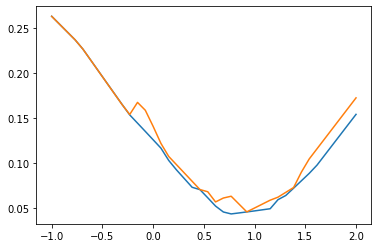

In [357]:
h_arr = np.linspace(-1,2,40)
results = [rho_VaR1(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

h_arr = np.linspace(-1,2,40)
results = [rho_VaR1(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

0.9230769230769231
0.9230769230769231


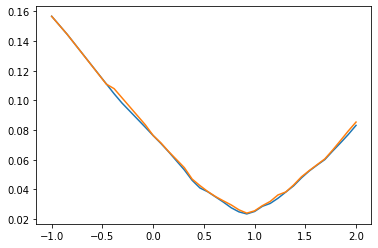

In [358]:
h_arr = np.linspace(-1,2,40)
results = [rho_VaR5(_rs, _rf, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])

h_arr = np.linspace(-1,2,40)
results = [rho_VaR5(_rs_c, _rf_c, h) for h in h_arr]
plt.plot(h_arr, results)
print(h_arr[np.argmin(results)])